In [1]:
import pandas as pd
from sklearn import metrics
from sklearn import neighbors,svm
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import numpy as np
import lightgbm as lgb
import csv
from matplotlib import pylab as plt
%matplotlib inline








In [2]:
import operator
from scipy import sparse
from sklearn.preprocessing import PolynomialFeatures
from sklearn import cross_validation
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import math

E:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import numpy as np
from sklearn import metrics
import bisect


def get_tpr_from_fpr(fpr_array, tpr_array, target):
    fpr_index = np.where(fpr_array == target)
    assert target <= 0.01, 'the value of fpr in the custom metric function need lt 0.01'
    if len(fpr_index[0]) > 0:
        return np.mean(tpr_array[fpr_index])
    else:
        tmp_index = bisect.bisect(fpr_array, target)
        fpr_tmp_1 = fpr_array[tmp_index-1]
        fpr_tmp_2 = fpr_array[tmp_index]
        if (target - fpr_tmp_1) > (fpr_tmp_2 - target):
            tpr_index = tmp_index
        else:
            tpr_index = tmp_index - 1
        return tpr_array[tpr_index]


def eval_metric(pred, dtrain):
    labels=dtrain.get_label()
    fpr, tpr, _ = metrics.roc_curve(labels, pred, pos_label=1)
    tpr1 = get_tpr_from_fpr(fpr, tpr, 0.001)
    tpr2 = get_tpr_from_fpr(fpr, tpr, 0.005)
    tpr3 = get_tpr_from_fpr(fpr, tpr, 0.01)
    return 0.4*tpr1 + 0.3*tpr2 + 0.3*tpr3

In [4]:
from sklearn.metrics import roc_curve 
def score(pred,labels): 
    
    fpr, tpr, thresholds = roc_curve(labels, pred, pos_label=1) 
    score=0.4*tpr[np.where(fpr>=0.001)[0][0]]+0.3*tpr[np.where(fpr>=0.005)[0][0]]+0.3*tpr[np.where(fpr>=0.01)[0][0]] 
    return score 

In [5]:
from sklearn.cross_validation import train_test_split 
'''
feature=[['f235', 0.24277271063415065, 0.5], ['f236', 0.23256584227052, 0.5], ['f234', 0.21852324880065013, 0.5], ['f238', 0.20669227663973286, 0.5], ['f237', 0.20567030143383547, 0.5], ['f215', 0.18003586190466467, 0.5], ['f7', 0.162332723652273, 0.5], ['f216', 0.1446281769584835, 0.5], ['f244', 0.13892783851103804, 0.5], ['f6', 0.13032218523874226, 0.5], ['f245', 0.1224749414492881, 0.5], ['f217', 0.11778605208130105, 0.5], ['f12', 0.11220688045867938, 0.5], ['f246', 0.0944845317959146, 0.5], ['f218', 0.0841674665273542, 0.5], ['f14', 0.07648252484818509, 0.5], ['f247', 0.05870535011692454, 0.5], ['f9', 0.054703167983445544, 0.5], ['f16', 0.054399978188648404, 0.5], ['f248', 0.054396213182353534, 0.5], ['f18', 0.053377355965473015, 0.5], ['f17', 0.05277656470300024, 0.5], ['f1', 0.048323215878311024, 0.5], ['f15', 0.04512025819443611, 0.5], ['f3', 0.033334950128024, 0.5], ['f243', 0.03116194081685024, 0.5], ['f242', 0.02845729625450647, 0.5], ['f253', 0.023578334266884604, 0.5], ['f11', 0.02343224272025608, 0.5], ['f250', 0.020784032759080837, 0.5], ['f4', 0.01995060944911291, 0.5], ['f241', 0.019680611801856637, 0.5], ['f240', 0.019468833516774347, 0.5], ['f252', 0.018630984649919094, 0.5], ['date', 0.018462271194602548, 0.5], ['f214', 0.017381164702992575, 0.5], ['f162', 0.01718247917779111, 0.5], ['f212', 0.01702770092843368, 0.5], ['f164', 0.01696777187422456, 0.5], ['f227', 0.016201156360754226, 0.5], ['f229', 0.016012814148916404, 0.5], ['f165', 0.015663417987175063, 0.5], ['f13', 0.015409398433251623, 0.5], ['f161', 0.015129186060917385, 0.5], ['f211', 0.01446420022336798, 0.5], ['f228', 0.013706938616999493, 0.5], ['f163', 0.013585267001421921, 0.5], ['f224', 0.01330379020966929, 0.5], ['f226', 0.012988463102088342, 0.5], ['f231', 0.012540905076059148, 0.5], ['f213', 0.012351265640991082, 0.5], ['f249', 0.01197224276917945, 0.5], ['f251', 0.011765270724995986, 0.5], ['f222', 0.011369904891302428, 0.5], ['f225', 0.011092105556587375, 0.5], ['f223', 0.011058827795219106, 0.5], ['f19', 0.010735071769281145, 0.5], ['f230', 0.009945204861347538, 0.5], ['f233', 0.009826605087938454, 0.5], ['f220', 0.009017478325812626, 0.5], ['f232', 0.008497838661735372, 0.5], ['f221', 0.00812703778627346, 0.5], ['f239', 0.007158846304609741, 0.5], ['f219', 0.004992909680328867, 0.5], ['f8', 0.0030139124544507705, 0.5], ['f2', 0.0009461512568509897, 0.5], ['f10', 0.00011296341219061222, 0.5]]
print len(feature)
feature=[['f261', 0.33029671565601293, 0.5], ['f260', 0.3256918087259907, 0.5], ['f259', 0.31760248730956275, 0.5], ['f262', 0.3084464625689011, 0.5], ['f264', 0.3041963844158335, 0.5], ['f271', 0.30097797868208404, 0.5], ['f265', 0.28776080074474697, 0.5], ['f270', 0.28751873987998744, 0.5], ['f263', 0.2760101410146563, 0.5], ['f266', 0.2656864100408039, 0.5], ['f235', 0.24277271063415065, 0.5], ['f204', 0.23975444749788635, 0.5], ['f236', 0.23256584227052, 0.5], ['f234', 0.21852324880065013, 0.5], ['f238', 0.20669227663973286, 0.5], ['f237', 0.20567030143383547, 0.5], ['f205', 0.2012304069895149, 0.5], ['f215', 0.18003586190466467, 0.5], ['f282', 0.1778345647631083, 0.5], ['f279', 0.17615169382462614, 0.5], ['f280', 0.1735188043708116, 0.5], ['f185', 0.17310082158890924, 0.5], ['f281', 0.1719725901849352, 0.5], ['f206', 0.16597615054025133, 0.5], ['f7', 0.162332723652273, 0.5], ['f5', 0.16066140709165044, 0.5], ['f31', 0.1583523257924094, 0.5], ['f30', 0.15785399326137475, 0.5], ['f184', 0.1510030619818684, 0.5], ['f210', 0.14830258889621756, 0.5], ['f216', 0.1446281769584835, 0.5], ['f244', 0.13892783851103804, 0.5], ['f292', 0.1311460861874161, 0.5], ['f6', 0.13032218523874226, 0.5], ['f278', 0.12865228772065992, 0.5], ['f291', 0.1264473027413392, 0.5], ['f183', 0.12598696397063203, 0.5], ['f29', 0.12408179484338454, 0.5], ['f245', 0.1224749414492881, 0.5], ['f28', 0.1220907170265826, 0.5], ['f25', 0.12185396668510393, 0.5], ['f288', 0.12152580105643564, 0.5], ['f209', 0.12110033379564805, 0.5], ['f52', 0.12064809718366401, 0.5], ['f24', 0.1197759400056249, 0.5], ['f54', 0.11974081344493727, 0.5], ['f27', 0.1192798407551253, 0.5], ['f217', 0.11778605208130105, 0.5], ['f53', 0.11668843442082216, 0.5], ['f207', 0.11303679541187028, 0.5], ['f26', 0.11262715447309721, 0.5], ['f12', 0.11220688045867938, 0.5], ['f192', 0.11166904718940875, 0.5], ['f193', 0.1092406872091875, 0.5], ['f55', 0.1087055633076366, 0.5], ['f191', 0.1067978076366178, 0.5], ['f203', 0.10609258422043565, 0.5], ['f269', 0.10525709907600397, 0.5], ['f198', 0.1045569149258525, 0.5], ['f202', 0.10444031998379756, 0.5], ['f258', 0.10338940508731749, 0.5], ['f289', 0.10289505644236875, 0.5], ['f197', 0.10243162344103808, 0.5], ['f295', 0.10220539864832512, 0.5], ['f290', 0.10161837418168125, 0.5], ['f23', 0.10089432492088636, 0.5], ['f208', 0.10058490598417756, 0.5], ['f287', 0.09884119716066825, 0.5], ['f171', 0.09874667628270627, 0.5], ['f182', 0.098419310585782, 0.5], ['f178', 0.09796041655203494, 0.5], ['f268', 0.09752601717418825, 0.5], ['f257', 0.09736030804508439, 0.5], ['f190', 0.09693387713836697, 0.5], ['f22', 0.09605622955475104, 0.5], ['f294', 0.09542769202583895, 0.5], ['f170', 0.09457535190394986, 0.5], ['f246', 0.0944845317959146, 0.5], ['f196', 0.09208113618253783, 0.5], ['f201', 0.09158404905534386, 0.5], ['f189', 0.09113585104655177, 0.5], ['f177', 0.09097951095107876, 0.5], ['f286', 0.08969558539371293, 0.5], ['f179', 0.0890766360380993, 0.5], ['f169', 0.08816998455282773, 0.5], ['f256', 0.08672909892748155, 0.5], ['f267', 0.08651489624380396, 0.5], ['f188', 0.08626570375368126, 0.5], ['f176', 0.08622975453524068, 0.5], ['f200', 0.08601213036661731, 0.5], ['f195', 0.08596828454145744, 0.5], ['f273', 0.08594555855375033, 0.5], ['f255', 0.08560827586391107, 0.5], ['f187', 0.08537577215914198, 0.5], ['f284', 0.0849704005402278, 0.5], ['f172', 0.08480597782826486, 0.5], ['f168', 0.08467757206371432, 0.5], ['f167', 0.08462565393082908, 0.5], ['f194', 0.08456918314911296, 0.5], ['f272', 0.08419423166659275, 0.5], ['f218', 0.0841674665273542, 0.5], ['f181', 0.08414832314255091, 0.5], ['f254', 0.0841362830008292, 0.5], ['f293', 0.08411310228420861, 0.5], ['f186', 0.0840798291494328, 0.5], ['f173', 0.08397061597596911, 0.5], ['f199', 0.0838438164647821, 0.5], ['f175', 0.08356909486338975, 0.5], ['f166', 0.08356360691507778, 0.5], ['f180', 0.08330551611471253, 0.5], ['f285', 0.08328763621608108, 0.5], ['f174', 0.08316884989081609, 0.5], ['f297', 0.08188051564608832, 0.5], ['f14', 0.07648252484818509, 0.5], ['f51', 0.07343907774716384, 0.5], ['f296', 0.07308733141757115, 0.5], ['f283', 0.07129804694972448, 0.5], ['f35', 0.06974768656022992, 0.5], ['f56', 0.06929521322397394, 0.5], ['f50', 0.06890433397867984, 0.5], ['f33', 0.06859021740630104, 0.5], ['f49', 0.06767099677762106, 0.5], ['f21', 0.06704136907002702, 0.5], ['f20', 0.06668239556629006, 0.5], ['f32', 0.0661886579465053, 0.5], ['f48', 0.06552948858769203, 0.5], ['f34', 0.06468940708924721, 0.5], ['f57', 0.060511793143733714, 0.5], ['f247', 0.05870535011692454, 0.5], ['f9', 0.054703167983445544, 0.5], ['f16', 0.054399978188648404, 0.5], ['f248', 0.054396213182353534, 0.5], ['f58', 0.054333426469621096, 0.5], ['f18', 0.053377355965473015, 0.5], ['f17', 0.05277656470300024, 0.5], ['f1', 0.048323215878311024, 0.5], ['f277', 0.04676142945807303, 0.5], ['f15', 0.04512025819443611, 0.5], ['f276', 0.04473680791620474, 0.5], ['f274', 0.04391347975224537, 0.5], ['f63', 0.03887945500678798, 0.5], ['f275', 0.038356129695047994, 0.5], ['f3', 0.033334950128024, 0.5], ['f62', 0.03253127337319326, 0.5], ['f243', 0.03116194081685024, 0.5], ['f242', 0.02845729625450647, 0.5], ['f61', 0.0241320625546105, 0.5], ['f253', 0.023578334266884604, 0.5], ['f11', 0.02343224272025608, 0.5], ['f250', 0.020784032759080837, 0.5], ['f4', 0.01995060944911291, 0.5], ['f241', 0.019680611801856637, 0.5], ['f240', 0.019468833516774347, 0.5], ['f252', 0.018630984649919094, 0.5], ['date', 0.018462271194602548, 0.5], ['f214', 0.017381164702992575, 0.5], ['f162', 0.01718247917779111, 0.5], ['f212', 0.01702770092843368, 0.5], ['f164', 0.01696777187422456, 0.5], ['f59', 0.016726084128679188, 0.5], ['f60', 0.01641419668203693, 0.5], ['f227', 0.016201156360754226, 0.5], ['f229', 0.016012814148916404, 0.5], ['f165', 0.015663417987175063, 0.5], ['f13', 0.015409398433251623, 0.5], ['f161', 0.015129186060917385, 0.5], ['f211', 0.01446420022336798, 0.5], ['f228', 0.013706938616999493, 0.5], ['f163', 0.013585267001421921, 0.5], ['f224', 0.01330379020966929, 0.5], ['f226', 0.012988463102088342, 0.5], ['f231', 0.012540905076059148, 0.5], ['f213', 0.012351265640991082, 0.5], ['f249', 0.01197224276917945, 0.5], ['f251', 0.011765270724995986, 0.5], ['f222', 0.011369904891302428, 0.5], ['f225', 0.011092105556587375, 0.5], ['f223', 0.011058827795219106, 0.5], ['f19', 0.010735071769281145, 0.5], ['f230', 0.009945204861347538, 0.5], ['f233', 0.009826605087938454, 0.5], ['f220', 0.009017478325812626, 0.5], ['f232', 0.008497838661735372, 0.5], ['f221', 0.00812703778627346, 0.5], ['f239', 0.007158846304609741, 0.5], ['f219', 0.004992909680328867, 0.5], ['f8', 0.0030139124544507705, 0.5], ['f2', 0.0009461512568509897, 0.5], ['f10', 0.00011296341219061222, 0.5]]
print len(feature)
s=map(lambda x:x[0],feature)[0:55]
'''
#去掉date
#s=['d', 'f7', 'f238', 'f248', 'f210', 'f6', 'f234', 'f82', 'f215', 'f244', 'f237', 'f253', 'f235', 'f236', 'f218', 'f245', 'f85', 'f15', 'f247', 'f243', 'f209', 'f84', 'f86', 'f14', 'f216', 'f18', 'f106', 'f252', 'f242', 'f246', 'f17', 'f5', 'f262', 'f208', 'f83', 'f207', 'f4', 'f30', 'f263', 'f222', 'f217', 'f81', 'f34', 'f204', 'f19', 'f52', 'f266', 'f241', 'f230', 'f220', 'f164', 'f240', 'f225', 'f29', 'f105', 'f31', 'f28', 'f5_0', 'f101', 'f205', 'y', 'f233', 'f27', 'f259', 'f25', 'f229', 'f53', 'f33', 'f232', 'f11', 'f260', 'f58', 'f261', 'f54', 'f249', 'f250', 'f231', 'f104', 'f48', 'f226', 'f239', 'f265', 'f185', 'f251', 'f55', 'f214', 'f57', 'f49', 'f50', 'f100', 'f279', 'f206', 'f223', 'f26', 'f221', 'f80', 'f51', 'f63', 'f56', 'f175', 'f192', 'f163', 'f23', 'f161', 'f184', 'f35', 'f219', 'f282', 'f284', 'f287', 'f32', 'f224', 'f162', 'f9', 'f16', 'f227', 'f290', 'f278', 'f264', 'f213', 'f13', 'f8', 'f1', 'f271', 'f79', 'f291', 'f270', 'f91', 'f286', 'f97', 'f24', 'f165', 'f12', 'f212', 'f99', 'f75', 'f21', 'f22', 'f297', 'f110', 'f211', 'f228', 'f289', 'f5_2', 'f103', 'f183', 'f62', 'f174', 'f283', 'f3', 'f10', 'f182', 'f281', 'f178', 'f285', 'f296', 'f78', 'f64', 'f294', 'f95', 'f257', 'f76', 'f102', 'f132', 'f181', 'f96', 'f142', 'f128', 'f77', 'f275', 'f179', 'f177', 'f98', 'f90', 'f20', 'f134', 'f73', 'f180', 'f280', 'f2', 'f176', 'f126', 'f202', 'f295', 'f274', 'f191', 'f109', 'f113', 'f256', 'f277', 'f276', 'f66', 'f93', 'f293', 'f193', 'f143', 'f166', 'f146', 'f70', 'f87', 'f167', 'f124', 'f154', 'f148', 'f61', 'f133', 'f71', 'f292', 'f74', 'f107', 'f89', 'f127', 'f197', 'f171', 'f140', 'f198', 'f131', 'f108', 'f130', 'f151', 'f144', 'f258', 'f268', 'f72', 'f67', 'f5_4', 'f129', 'f145', 'f190', 'f196', 'f189', 'f288', 'f273', 'f92', 'f65', 'f254', 'f200', 'f187', 'f203', 'f199', 'f94', 'f116', 'f188', 'f59', 'f125', 'f139', 'f172', 'f173', 'f60', 'f255', 'f269', 'f88', 'f68', 'f168', 'f272', 'f120', 'f170', 'f195', 'f40', 'f122', 'f267', 'f141', 'f136', 'f123', 'f150', 'f159', 'f186', 'f155', 'f157', 'f137', 'f112', 'f156', 'f158', 'f5_1', 'f201', 'f117', 'f147', 'f160', 'f118', 'f115', 'f138', 'f169', 'f152', 'f121', 'f119', 'f69', 'f39', 'f194', 'f149', 'f111', 'f135', 'f153', 'f114', 'f46', 'f45', 'f42', 'f44', 'f47', 'f43', 'f38', 'f5_5', 'f41', 'f37', 'f36']
s=['f5_0', 'f5_1','f5_2','f5_3','f5_4','f5_5','d', 'f7', 'f248', 'f238', 'f6', 'f237', 'f234', 'f215', 'f210', 'f236', 'f244', 'f247', 'f253', 'f218', 'f243', 'f245', 'f235', 'f246', 'f15', 'f5', 'f17', 'f82', 'f217', 'f216', 'f14', 'f18', 'f19', 'f252', 'f242', 'f4', 'f209', 'f164', 'f85', 'f106', 'f222', 'f84', 'f230', 'f241', 'f226', 'f220', 'f86', 'f11', 'f233', 'f240', 'f250', 'f249', 'f225', 'f204', 'f221', 'f224', 'f231', 'f214', 'f232', 'f239', 'f207', 'f223', 'f262', 'f266', 'f162', 'f208', 'f163', 'f229', 'f83', 'f263', 'f251', 'f81', 'f212', 'f228', 'f219', 'f227', 'f213', 'f101', 'f161', 'f8', 'f165', 'f34', 'f211', 'f30', 'f9', 'f31', 'f1', 'f13', 'f52', 'f260', 'f259', 'f205', 'f12', 'f3', 'f33', 'f58', 'f53', 'f206', 'f105', 'f265', 'f261', 'f57', 'f16', 'f270', 'f48', 'f279', 'f29', 'f264', 'f10', 'f80', 'f28', 'f291', 'f50', 'f55', 'f25', 'f26', 'f49', 'f290', 'f51', 'f54', 'f2', 'f35', 'f271', 'f63', 'f27', 'f284', 'f278', 'f184', 'f185', 'f100', 'f282', 'f32', 'y', 'f297', 'f289', 'f283', 'f103', 'f174', 'f79', 'f287', 'f56', 'f23', 'f192', 'f104', 'f285', 'f183', 'f22', 'f281', 'f99', 'f175', 'f296', 'f24', 'f181', 'f21', 'm', 'f286', 'f182', 'f75', 'f193', 'f62', 'f295', 'f73', 'f191', 'f178', 'f102', 'f91', 'f293', 'f78', 'f294', 'f97', 'f110', 'f76', 'f277', 'f275', 'f180', 'f177', 'f189', 'f77', 'f280', 'f134', 'f274', 'f90', 'f93', 'f142', 'f168', 'f257', 'f113', 'f179', 'f87', 'f143', 'f187', 'f276', 'f195', 'f199', 'f66', 'f254', 'f166', 'f107', 'f95', 'f70', 'f132', 'f202', 'f109', 'f20', 'f130', 'f128', 'f203', 'f292', 'f61', 'f288', 'f176', 'f171', 'f273', 'f197', 'f172', 'f255', 'f167', 'f96', 'f72', 'f256', 'f196', 'f151', 'f98', 'f89', 'f127', 'f173', 'f71', 'f64', 'f65', 'f201', 'f170', 'f74', 'f148', 'f140', 'f200', 'f124', 'f88', 'f144', 'f67', 'f188', 'f133', 'f198', 'f186', 'f146', 'f190', 'f126', 'f145', 'f267', 'f258', 'f268', 'f269', 'f131', 'f154', 'f108', 'f40', 'f125', 'f60', 'f169', 'f94', 'f129', 'f194', 'f112', 'f147', 'f120', 'f59', 'f139', 'f158', 'f68', 'f119', 'f92', 'f155', 'f159', 'f116', 'f141', 'f114', 'f123', 'f156', 'f136', 'f272', 'f117', 'f138', 'f121', 'f160', 'f118', 'f122', 'f69', 'f137', 'f149', 'f111', 'f150', 'f152', 'f42', 'f157', 'f115', 'f135', 'f153', 'f39', 'f45', 'f47', 'f36', 'f46', 'f38', 'f41', 'f43', 'f44', 'f37']
#s=[ 'y','m','d','f18', 'f17', 'f16', 'f15', 'f14', 'f13', 'f12', 'f11', 'f10', 'f9', 'f19', 'f7', 'f6', 'f4', 'f3', 'f2', 'f1', 'date', 'f8', 'f239', 'f238', 'f237', 'f233', 'f235', 'f234', 'f240', 'f232', 'f236', 'f241', 'f245', 'f243', 'f244', 'f246', 'f247', 'f248', 'f249', 'f250', 'f231', 'f251', 'f162', 'f230', 'f220', 'f228', 'f163', 'f164', 'f165', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f229', 'f217', 'f219', 'f252', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f218', 'f253', 'f242', 'f161', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f188', 'f255', 'f187', 'f185', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f186', 'f209', 'f254', 'f273', 'f210', 'f272', 'f271', 'f270', 'f269', 'f268', 'f267', 'f266', 'f274', 'f265', 'f263', 'f262', 'f261', 'f260', 'f259', 'f258', 'f257', 'f256', 'f264', 'f275', 'f208', 'f277', 'f276', 'f20', 'f21', 'f23', 'f53', 'f52', 'f22', 'f283', 'f295', 'f278', 'f279', 'f280', 'f294', 'f293', 'f292', 'f291', 'f290', 'f289', 'f288', 'f281', 'f286', 'f285', 'f282', 'f284', 'f287', 'f297', 'f24', 'f25', 'f26', 'f27', 'f296', 'f5', 'f56', 'f55', 'f57', 'f58', 'f61', 'f60', 'f54', 'f62', 'f63', 'f59', 'f51', 'f49', 'f48', 'f50', 'f35', 'f34', 'f33', 'f32', 'f31', 'f30', 'f29', 'f28', 'f89', 'f85', 'f86', 'f87', 'f88', 'f90', 'f91', 'f93', 'f94', 'f95', 'f96', 'f97', 'f84', 'f92', 'f83', 'f64', 'f81', 'f80', 'f79', 'f78', 'f77', 'f76', 'f71', 'f70', 'f69', 'f68', 'f67', 'f66', 'f65', 'f98', 'f82', 'f99', 'f147', 'f101', 'f128', 'f129', 'f130', 'f131', 'f132', 'f100', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f127', 'f140', 'f142', 'f143', 'f144', 'f145', 'f146', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f141', 'f126', 'f133', 'f124', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f118', 'f119', 'f117', 'f121', 'f122', 'f123', 'f120', 'f125', 'f109', 'f155', 'f156', 'f157', 'f158', 'f107', 'f160', 'f108', 'f159', 'f110', 'f72', 'f73', 'f74', 'f75', 'f102', 'f103', 'f104', 'f105', 'f106', 'f42', 'f47', 'f46', 'f45', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f43', 'f44']
#s=['f210', 'f67', 'f68', 'f66', 'f69', 'f70', 'f154', 'f71', 'f120', 'f121', 'f152', 'f114', 'f113', 'f115', 'f151', 'f122', 'f153', 'f118', 'f116', 'f149', 'f117', 'f111', 'f119', 'f150', 'f112', 'f288', 'f289', 'f148', 'f290', 'f142', 'f143', 'f292', 'f106', 'f280', 'f281', 'f282', 'f64', 'f75', 'f73', 'f293', 'f294', 'f295', 'f279', 'f209', 'f144', 'f145', 'f297', 'f146', 'f130', 'f147', 'f110', 'f105', 'f287', 'f286', 'f285', 'f284', 'f134']
print (len(s))
#s=s[0:70]
print (len(s))
print ("load train")
trainData= pd.read_csv('small_train.csv',header=0)
trainData=trainData[trainData.label!=-1]
#print ("load test")
#testData = pd.read_csv('test_set_b_0.csv',header=0)
trainData['y']=trainData['date']//1000
trainData['m']=trainData['date']//100%100
trainData['d']=trainData['date']%100
trainData['f5_0']=trainData['f5']%10
trainData['f5_1']=trainData['f5']//10%10
trainData['f5_2']=trainData['f5']//100%10
trainData['f5_3']=trainData['f5']//1000%10
trainData['f5_4']=trainData['f5']//10000%10
trainData['f5_5']=trainData['f5']//100000
trainData=trainData.sort_values(by='date')
trainData=trainData.fillna(-1)
#trainData=trainData.loc[:,s].fillna(-1)

#testData=testData.fillna(0)

#test_x=np.array(testData.loc[:,s])
#train_x=trainData.loc[:,s]
#train_y=trainData.loc[:,'label']



306
306
load train


In [6]:
#trainData.head(15)

In [7]:
#

In [8]:
#eval_X.head(-1)

In [9]:
rate=0.5


train_X=trainData.loc[:int(trainData.shape[0]*rate),:]
eval_X0=trainData.loc[int(trainData.shape[0]*rate):,:]
train_Y=train_X.label
del train_X['label']
eval_Y0=eval_X0.label
del eval_X0['label']
train_X1,eval_X,train_Y1,eval_Y = train_test_split(eval_X0,eval_Y0,test_size=0.5,random_state=0)
del eval_X0,eval_Y0
train_X,train_Y=train_X.append(train_X1),train_Y.append(train_Y1)
train_X=train_X.loc[:,s]
eval_X=eval_X.loc[:,s]


lgb_train = lgb.Dataset(train_X,train_Y)
lgb_eval = lgb.Dataset(eval_X,eval_Y,reference=lgb_train)

In [10]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'auc', 'binary_logloss'},
    'min_child_weight': 1.5,
    'num_leaves': 2 ** 5,
    'lambda_l2': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'colsample_bylevel': 0.7,
    'learning_rate': 0.05,
    'tree_method': 'exact',
    'seed': 2017,
    'nthread': 12,

}

model = lgb.train(params,
            lgb_train,
            num_boost_round=10000,
            valid_sets=lgb_eval,
           # feval=eval_metric,
            early_stopping_rounds=50)


[1]	valid_0's auc: 0.951807	valid_0's binary_logloss: 0.652479
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.964754	valid_0's binary_logloss: 0.615074
[3]	valid_0's auc: 0.968351	valid_0's binary_logloss: 0.58037
[4]	valid_0's auc: 0.96802	valid_0's binary_logloss: 0.54976
[5]	valid_0's auc: 0.969134	valid_0's binary_logloss: 0.520559
[6]	valid_0's auc: 0.972481	valid_0's binary_logloss: 0.493519
[7]	valid_0's auc: 0.975197	valid_0's binary_logloss: 0.468772
[8]	valid_0's auc: 0.97511	valid_0's binary_logloss: 0.445942
[9]	valid_0's auc: 0.975067	valid_0's binary_logloss: 0.425041
[10]	valid_0's auc: 0.976152	valid_0's binary_logloss: 0.405304
[11]	valid_0's auc: 0.976148	valid_0's binary_logloss: 0.387054
[12]	valid_0's auc: 0.976122	valid_0's binary_logloss: 0.3702
[13]	valid_0's auc: 0.976309	valid_0's binary_logloss: 0.354554
[14]	valid_0's auc: 0.976251	valid_0's binary_logloss: 0.339903
[15]	valid_0's auc: 0.976181	valid_0's binary_logloss: 0.

[128]	valid_0's auc: 0.987186	valid_0's binary_logloss: 0.0868551
[129]	valid_0's auc: 0.987188	valid_0's binary_logloss: 0.0867522
[130]	valid_0's auc: 0.987245	valid_0's binary_logloss: 0.0865723
[131]	valid_0's auc: 0.987265	valid_0's binary_logloss: 0.0864481
[132]	valid_0's auc: 0.987261	valid_0's binary_logloss: 0.0863792
[133]	valid_0's auc: 0.98728	valid_0's binary_logloss: 0.0862841
[134]	valid_0's auc: 0.987302	valid_0's binary_logloss: 0.0861707
[135]	valid_0's auc: 0.987325	valid_0's binary_logloss: 0.0860596
[136]	valid_0's auc: 0.987346	valid_0's binary_logloss: 0.0859276
[137]	valid_0's auc: 0.987373	valid_0's binary_logloss: 0.0858305
[138]	valid_0's auc: 0.987396	valid_0's binary_logloss: 0.0857411
[139]	valid_0's auc: 0.987413	valid_0's binary_logloss: 0.085639
[140]	valid_0's auc: 0.987428	valid_0's binary_logloss: 0.0855631
[141]	valid_0's auc: 0.987438	valid_0's binary_logloss: 0.0854738
[142]	valid_0's auc: 0.987462	valid_0's binary_logloss: 0.0853971
[143]	valid_

[254]	valid_0's auc: 0.988721	valid_0's binary_logloss: 0.0802379
[255]	valid_0's auc: 0.988727	valid_0's binary_logloss: 0.0802173
[256]	valid_0's auc: 0.988729	valid_0's binary_logloss: 0.0802078
[257]	valid_0's auc: 0.98874	valid_0's binary_logloss: 0.080194
[258]	valid_0's auc: 0.988747	valid_0's binary_logloss: 0.0801741
[259]	valid_0's auc: 0.988756	valid_0's binary_logloss: 0.0801235
[260]	valid_0's auc: 0.988762	valid_0's binary_logloss: 0.0800867
[261]	valid_0's auc: 0.988778	valid_0's binary_logloss: 0.080034
[262]	valid_0's auc: 0.988781	valid_0's binary_logloss: 0.0800223
[263]	valid_0's auc: 0.988772	valid_0's binary_logloss: 0.080027
[264]	valid_0's auc: 0.98878	valid_0's binary_logloss: 0.0800048
[265]	valid_0's auc: 0.988779	valid_0's binary_logloss: 0.0799929
[266]	valid_0's auc: 0.988781	valid_0's binary_logloss: 0.0799706
[267]	valid_0's auc: 0.988782	valid_0's binary_logloss: 0.0799767
[268]	valid_0's auc: 0.98879	valid_0's binary_logloss: 0.0799627
[269]	valid_0's 

[379]	valid_0's auc: 0.989197	valid_0's binary_logloss: 0.0785219
[380]	valid_0's auc: 0.989202	valid_0's binary_logloss: 0.078519
[381]	valid_0's auc: 0.989207	valid_0's binary_logloss: 0.078508
[382]	valid_0's auc: 0.989207	valid_0's binary_logloss: 0.0784971
[383]	valid_0's auc: 0.989215	valid_0's binary_logloss: 0.0784686
[384]	valid_0's auc: 0.989223	valid_0's binary_logloss: 0.0784617
[385]	valid_0's auc: 0.989221	valid_0's binary_logloss: 0.0784643
[386]	valid_0's auc: 0.989224	valid_0's binary_logloss: 0.0784458
[387]	valid_0's auc: 0.98924	valid_0's binary_logloss: 0.0783586
[388]	valid_0's auc: 0.989244	valid_0's binary_logloss: 0.0783431
[389]	valid_0's auc: 0.989253	valid_0's binary_logloss: 0.0783246
[390]	valid_0's auc: 0.989248	valid_0's binary_logloss: 0.0783269
[391]	valid_0's auc: 0.989243	valid_0's binary_logloss: 0.0783288
[392]	valid_0's auc: 0.989249	valid_0's binary_logloss: 0.0783176
[393]	valid_0's auc: 0.989243	valid_0's binary_logloss: 0.0783247
[394]	valid_0

[505]	valid_0's auc: 0.989496	valid_0's binary_logloss: 0.0774184
[506]	valid_0's auc: 0.989498	valid_0's binary_logloss: 0.077417
[507]	valid_0's auc: 0.989504	valid_0's binary_logloss: 0.0773997
[508]	valid_0's auc: 0.989506	valid_0's binary_logloss: 0.077401
[509]	valid_0's auc: 0.989502	valid_0's binary_logloss: 0.0774086
[510]	valid_0's auc: 0.9895	valid_0's binary_logloss: 0.077418
[511]	valid_0's auc: 0.9895	valid_0's binary_logloss: 0.0774203
[512]	valid_0's auc: 0.989502	valid_0's binary_logloss: 0.077415
[513]	valid_0's auc: 0.98951	valid_0's binary_logloss: 0.0773927
[514]	valid_0's auc: 0.989511	valid_0's binary_logloss: 0.0773845
[515]	valid_0's auc: 0.989515	valid_0's binary_logloss: 0.0773822
[516]	valid_0's auc: 0.989519	valid_0's binary_logloss: 0.0773775
[517]	valid_0's auc: 0.989516	valid_0's binary_logloss: 0.0773679
[518]	valid_0's auc: 0.989512	valid_0's binary_logloss: 0.077379
[519]	valid_0's auc: 0.98951	valid_0's binary_logloss: 0.0773819
[520]	valid_0's auc: 

[631]	valid_0's auc: 0.989718	valid_0's binary_logloss: 0.0768282
[632]	valid_0's auc: 0.989718	valid_0's binary_logloss: 0.0768321
[633]	valid_0's auc: 0.989726	valid_0's binary_logloss: 0.0767827
[634]	valid_0's auc: 0.989728	valid_0's binary_logloss: 0.0767822
[635]	valid_0's auc: 0.989729	valid_0's binary_logloss: 0.0767799
[636]	valid_0's auc: 0.989731	valid_0's binary_logloss: 0.0767698
[637]	valid_0's auc: 0.989731	valid_0's binary_logloss: 0.0767814
[638]	valid_0's auc: 0.989731	valid_0's binary_logloss: 0.0767837
[639]	valid_0's auc: 0.989734	valid_0's binary_logloss: 0.076782
[640]	valid_0's auc: 0.989736	valid_0's binary_logloss: 0.0767848
[641]	valid_0's auc: 0.989736	valid_0's binary_logloss: 0.0767905
[642]	valid_0's auc: 0.989737	valid_0's binary_logloss: 0.0767855
[643]	valid_0's auc: 0.989734	valid_0's binary_logloss: 0.0767953
[644]	valid_0's auc: 0.989741	valid_0's binary_logloss: 0.0767694
[645]	valid_0's auc: 0.989743	valid_0's binary_logloss: 0.0767657
[646]	valid

[756]	valid_0's auc: 0.989882	valid_0's binary_logloss: 0.0764411
[757]	valid_0's auc: 0.989883	valid_0's binary_logloss: 0.0764452
[758]	valid_0's auc: 0.989883	valid_0's binary_logloss: 0.0764462
[759]	valid_0's auc: 0.989887	valid_0's binary_logloss: 0.0764488
[760]	valid_0's auc: 0.989885	valid_0's binary_logloss: 0.0764536
[761]	valid_0's auc: 0.989884	valid_0's binary_logloss: 0.0764489
[762]	valid_0's auc: 0.989886	valid_0's binary_logloss: 0.0764407
[763]	valid_0's auc: 0.989884	valid_0's binary_logloss: 0.0764447
[764]	valid_0's auc: 0.989887	valid_0's binary_logloss: 0.076439
[765]	valid_0's auc: 0.98989	valid_0's binary_logloss: 0.0764361
[766]	valid_0's auc: 0.989885	valid_0's binary_logloss: 0.0764433
[767]	valid_0's auc: 0.989888	valid_0's binary_logloss: 0.076441
[768]	valid_0's auc: 0.989892	valid_0's binary_logloss: 0.0764343
[769]	valid_0's auc: 0.989892	valid_0's binary_logloss: 0.076431
[770]	valid_0's auc: 0.9899	valid_0's binary_logloss: 0.0764004
[771]	valid_0's 

In [11]:
model.save_model('lgb_model_featurechoosing.txt')

In [14]:
predicted_eval = model.predict(eval_X,num_iteration=model.best_iteration)
print(score(predicted_eval,np.array(eval_Y)))

0.55418923224


In [15]:
print('特征重要性：'+ str(list(model.feature_importance())))

特征重要性：[117, 55, 51, 0, 42, 12, 697, 761, 370, 327, 292, 275, 376, 268, 416, 220, 257, 227, 225, 234, 222, 231, 258, 157, 246, 169, 166, 320, 145, 190, 178, 189, 152, 182, 199, 161, 174, 129, 181, 179, 132, 138, 127, 128, 78, 150, 158, 98, 115, 111, 96, 106, 141, 144, 87, 76, 91, 51, 122, 86, 143, 69, 187, 147, 91, 155, 76, 116, 109, 133, 107, 169, 55, 81, 95, 68, 58, 109, 78, 104, 58, 184, 66, 195, 71, 117, 88, 52, 142, 128, 95, 105, 76, 49, 135, 70, 148, 92, 108, 106, 98, 81, 77, 90, 78, 107, 130, 75, 62, 75, 129, 91, 63, 49, 146, 107, 90, 69, 57, 66, 24, 54, 83, 84, 153, 57, 113, 93, 86, 76, 59, 53, 113, 82, 51, 70, 46, 50, 64, 105, 74, 75, 77, 102, 79, 33, 48, 53, 56, 66, 47, 71, 39, 69, 110, 68, 70, 45, 40, 47, 52, 34, 47, 67, 26, 58, 42, 47, 60, 72, 87, 61, 17, 46, 25, 43, 26, 38, 41, 34, 33, 46, 38, 42, 19, 61, 27, 49, 50, 28, 27, 28, 22, 26, 27, 22, 19, 14, 40, 32, 48, 51, 42, 28, 40, 55, 33, 31, 29, 42, 37, 26, 22, 19, 23, 10, 31, 41, 30, 42, 30, 28, 42, 27, 28, 17, 15, 58, 39,

In [16]:
print(model.feature_importance())

[117  55  51   0  42  12 697 761 370 327 292 275 376 268 416 220 257 227
 225 234 222 231 258 157 246 169 166 320 145 190 178 189 152 182 199 161
 174 129 181 179 132 138 127 128  78 150 158  98 115 111  96 106 141 144
  87  76  91  51 122  86 143  69 187 147  91 155  76 116 109 133 107 169
  55  81  95  68  58 109  78 104  58 184  66 195  71 117  88  52 142 128
  95 105  76  49 135  70 148  92 108 106  98  81  77  90  78 107 130  75
  62  75 129  91  63  49 146 107  90  69  57  66  24  54  83  84 153  57
 113  93  86  76  59  53 113  82  51  70  46  50  64 105  74  75  77 102
  79  33  48  53  56  66  47  71  39  69 110  68  70  45  40  47  52  34
  47  67  26  58  42  47  60  72  87  61  17  46  25  43  26  38  41  34
  33  46  38  42  19  61  27  49  50  28  27  28  22  26  27  22  19  14
  40  32  48  51  42  28  40  55  33  31  29  42  37  26  22  19  23  10
  31  41  30  42  30  28  42  27  28  17  15  58  39  16  21  30  35  48
  20  36  15  31  37  14  30  19  24  38  26  57  2

In [29]:
#pd.DataFrame(model.feature_importance(),columns=['fscore'])
#pd.DataFrame(s, columns=['feature'])

In [34]:
df=pd.concat([pd.DataFrame(s, columns=['feature']),pd.DataFrame(model.feature_importance(),columns=['fscore'])],axis=1)

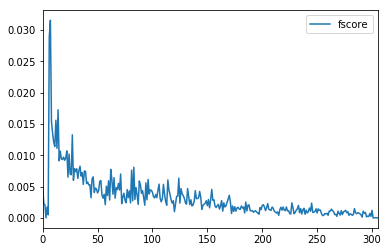

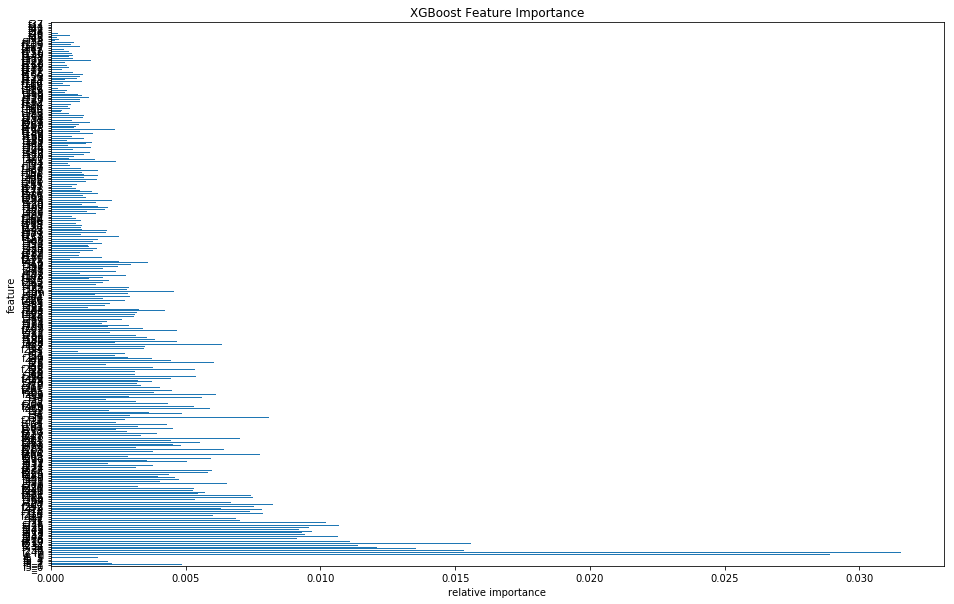

In [35]:
#df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('LGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_lgb.png')

In [36]:
df=df.sort_values(by='fscore',ascending=False).reset_index()
ss=df.loc[:,'feature']
s=np.array(ss).tolist()
print (s)

['f7', 'd', 'f210', 'f234', 'f248', 'f238', 'f82', 'f6', 'f237', 'f215', 'f235', 'f244', 'f15', 'f218', 'f245', 'f247', 'f253', 'f243', 'f236', 'f242', 'f30', 'f216', 'f18', 'f262', 'f34', 'f252', 'f85', 'f106', 'f14', 'f209', 'f5', 'f81', 'f17', 'f4', 'f86', 'f246', 'f208', 'f27', 'f19', 'f220', 'f53', 'f266', 'f25', 'f217', 'f204', 'f207', 'f52', 'f225', 'f84', 'f33', 'f263', 'f222', 'f29', 'f164', 'f28', 'f260', 'f241', 'f230', 'f232', 'f31', 'f5_0', 'f229', 'f233', 'f278', 'y', 'f240', 'm', 'f101', 'f83', 'f105', 'f279', 'f251', 'f26', 'f265', 'f249', 'f287', 'f205', 'f8', 'f104', 'f11', 'f261', 'f250', 'f219', 'f259', 'f184', 'f206', 'f291', 'f231', 'f162', 'f270', 'f49', 'f1', 'f110', 'f221', 'f239', 'f185', 'f63', 'f271', 'f297', 'f228', 'f57', 'f285', 'f48', 'f161', 'f226', 'f16', 'f192', 'f100', 'f12', 'f224', 'f163', 'f264', 'f23', 'f80', 'f56', 'f97', 'f9', 'f24', 'f283', 'f58', 'f182', 'f21', 'f223', 'f290', 'f286', 'f227', 'f178', 'f211', 'f175', 'f54', 'f79', 'f50', 'f10'